In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from matplotlib import pyplot
df = pd.read_csv('EEG_data.csv')

In [2]:
#df.drop(df[df['SubjectID'] == 6.0].index, inplace = True) 

In [3]:
df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [4]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [5]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)
X_train_, X_test_, y_train, y_test = train_test_split(X_ss, y, test_size=0.25, random_state=42)

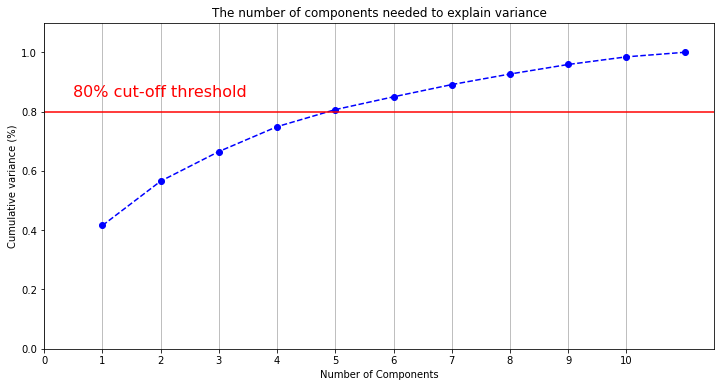

In [6]:
pca = PCA().fit(X_ss)

%matplotlib inline
pyplot.rcParams["figure.figsize"] = (12,6)

fig, ax = pyplot.subplots()
xi = np.arange(1, 12, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

pyplot.ylim(0.0,1.1)
pyplot.plot(xi, yi, marker='o', linestyle='--', color='b')

pyplot.xlabel('Number of Components')
pyplot.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
pyplot.ylabel('Cumulative variance (%)')
pyplot.title('The number of components needed to explain variance')

pyplot.axhline(y=0.80, color='r', linestyle='-')
pyplot.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
pyplot.show()

In [7]:
model_pca = PCA(n_components=5)

X_train = model_pca.fit_transform(X_train_)
X_test  = model_pca.transform(X_test_)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=93)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("RandomForest")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

RandomForest
Accuracy: 0.6347174523883858
Precision: 0.6324683162341581
Recall: 0.651336233685519
F1 Score: 0.6417636252296387
False Positive Rate: 0.38205771643663744
False Negative Rate: 0.34866376631448104


In [9]:
# input_cols = ['F0', 'F1', 'F2', 'F3', 'F4']

In [10]:
# importance = rfc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Decision Tree
Accuracy: 0.5725881985638464
Precision: 0.5713436385255648
Recall: 0.5972653822249845
F1 Score: 0.5840170161045275
False Positive Rate: 0.45232120451693847
False Negative Rate: 0.4027346177750155


In [12]:
# importance = dt.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None , var_smoothing = 0.50)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

GNB
Accuracy: 0.5504214798626288
Precision: 0.6215827338129496
Recall: 0.2684897451833437
F1 Score: 0.375
False Positive Rate: 0.16499372647427857
False Negative Rate: 0.7315102548166563


In [14]:
# from sklearn.inspection import permutation_importance

# imps = permutation_importance(gnb, X_test, y_test)
# print(imps.importances_mean)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

KNN
Accuracy: 0.6150483921323759
Precision: 0.6099415204678362
Recall: 0.6482287134866377
F1 Score: 0.6285025610123532
False Positive Rate: 0.418444165621079
False Negative Rate: 0.3517712865133623


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=29, n_estimators=200,subsample=0.1 )
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print("GBC")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))


tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

GBC
Accuracy: 0.6241024039962535
Precision: 0.6231003039513677
Recall: 0.637041640770665
F1 Score: 0.6299938537185004
False Positive Rate: 0.3889585947302384
False Negative Rate: 0.36295835922933495


In [17]:
# importance = gbc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,gamma=0.3,learning_rate=0.05,max_depth=12)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGB")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

XGB
Accuracy: 0.6365906962222916
Precision: 0.6346037507562009
Recall: 0.6519577377252952
F1 Score: 0.6431637032495402
False Positive Rate: 0.3789209535759097
False Negative Rate: 0.3480422622747048


In [19]:
# importance = xgb.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

In [20]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rfc, n_estimators=20, random_state=1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.6412738058070558
Precision: 0.639225181598063
Recall: 0.656308266003729
F1 Score: 0.6476540938362466
False Positive Rate: 0.3739021329987453
False Negative Rate: 0.34369173399627095
